En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
4. Intenta superarte en el score cambiando las features de los algoritmos.

## El modelo de 'SVM' y el de Regresión logística tienen un porcentaje de aciertos similar. 94,73% y 94,74% respectivamente. El más bajo porcentaje de aciertos lo da el modelo de 'KNN' con un porcentaje del 91,22%

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']])


In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [45]:
# print the label cancer(malignant, benign)
print(cancer.target_names)

['malignant' 'benign']


In [46]:
cancer.target_names[0]

'malignant'

In [31]:
# print the names of the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Métodos de clasificación: regresión logística, KNN y svm

## Regresión logística

In [6]:
# Establecemos que columnas son variables independientes y cual dependiente
X = np.array(df.drop([30], axis=1))
y = np.array(df[30])
print(y.shape)
X.shape

(569,)


(569, 30)

In [127]:
model = linear_model.LogisticRegression(max_iter=150, solver='liblinear')

model.fit(X,y)
model.score(X, y)

0.9595782073813708

## Validamos el modelo

In [128]:
seed =7
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [129]:
model = linear_model.LogisticRegression(max_iter=150, solver='liblinear')
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=3, random_state=None) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
# cross_val_score 
cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results)
print("----------")
print(msg)

[0.95394737 0.93421053 0.94701987]
----------
Logistic Regression: 0.945059 +- (0.008176)


In [130]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=150, solver='liblinear')

In [131]:
model.score(x_train, y_train)

0.9604395604395605

In [113]:
model.score(x_test, y_test)

0.9473684210526315

In [132]:
predictions = model.predict(x_test)
print(model.score(X=x_test, y=y_test))
print(accuracy_score(y_test, predictions))

0.9473684210526315
0.9473684210526315


In [133]:
acierto = accuracy_score(y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 94.74 %
Error: 5.26 %


In [137]:
# matriz de confusión
print(confusion_matrix(y_test, predictions))


[[34  6]
 [ 0 74]]


## Knn

In [58]:
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']])


In [59]:
# Establecemos las variables que serán independientes (X) y la dependiente (y)
df2 = df.iloc[:, :30]
X = df2.values
y = df [30]

In [60]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


([<matplotlib.axis.XTick at 0x2d9ef6c5cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

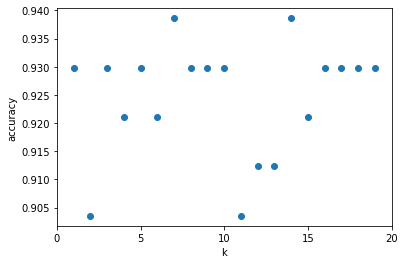

In [13]:
# K entre 1 y 20
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [14]:
scores

{1: 0.9298245614035088,
 2: 0.9035087719298246,
 3: 0.9298245614035088,
 4: 0.9210526315789473,
 5: 0.9298245614035088,
 6: 0.9210526315789473,
 7: 0.9385964912280702,
 8: 0.9298245614035088,
 9: 0.9298245614035088,
 10: 0.9298245614035088,
 11: 0.9035087719298246,
 12: 0.9122807017543859,
 13: 0.9122807017543859,
 14: 0.9385964912280702,
 15: 0.9210526315789473,
 16: 0.9298245614035088,
 17: 0.9298245614035088,
 18: 0.9298245614035088,
 19: 0.9298245614035088}

([<matplotlib.axis.XTick at 0x2d9ef73f760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

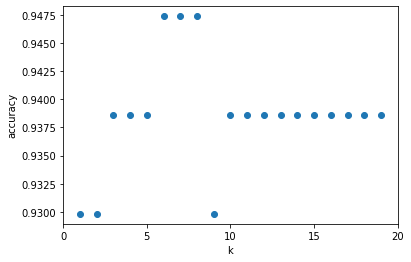

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [16]:
scores

{1: 0.9298245614035088,
 2: 0.9298245614035088,
 3: 0.9385964912280702,
 4: 0.9385964912280702,
 5: 0.9385964912280702,
 6: 0.9473684210526315,
 7: 0.9473684210526315,
 8: 0.9473684210526315,
 9: 0.9298245614035088,
 10: 0.9385964912280702,
 11: 0.9385964912280702,
 12: 0.9385964912280702,
 13: 0.9385964912280702,
 14: 0.9385964912280702,
 15: 0.9385964912280702,
 16: 0.9385964912280702,
 17: 0.9385964912280702,
 18: 0.9385964912280702,
 19: 0.9385964912280702}

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
#Aplicamos el modelo en toda la base
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [18]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier: 3
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array([1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.])

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


## Svm

In [47]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import svm




In [48]:
def plot_data(X, y):
    """
    Plots the data points X and y into a new figure.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Target values (class labels in classification).
    """
    pos = np.nonzero(y == 1)
    neg = np.nonzero(y == 0)
    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='y')


In [49]:
def visualize_boundary_linear(X, y, clf):
    """
    Plots a linear decision boundary learned by the SVM.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    clf : Support Vector Classification
        The trained SVM.
    """
    plot_data(X, y)

    coef = clf.coef_.ravel()
    intercept = clf.intercept_.ravel()

    xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    yp = -1.0 * (coef[0] * xp + intercept[0]) / coef[1]

    plt.plot(xp, yp, linestyle='-', color='b')


In [50]:
def visualize_boundary(X, y, clf):
    """
    Plots a linear decision boundary learned by the SVM.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    clf : sklearn.svm.classes.SVC
        The trained SVM.
    """
    plot_data(X, y)
    x1_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    x2_plot = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1_plot, x2_plot)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        X_tmp = np.hstack((X1[:, i:i + 1], X2[:, i:i + 1]))
        vals[:, i] = clf.predict(X_tmp)
    plt.contour(X1, X2, vals, levels=[0])


In [15]:
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']])

In [51]:
df2 = df.iloc[:, :30]
X = df2.values
y = df[30].ravel()

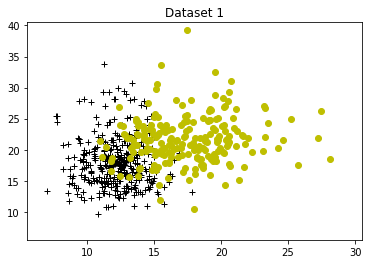

In [52]:
plt.figure()
plot_data(X, y)
plt.xlim([5.5, 30.5])
plt.ylim([5.5, 40.5])
plt.title("Dataset 1")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
score: 0.7398945518453427


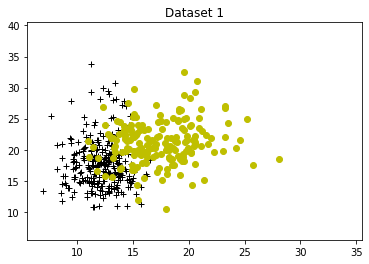

In [54]:
from sklearn import svm
# Cuando más se aproxima  C  a cero, menos se penalizan los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano.  C  es a fin de cuentas el hiperparámetro encargado de controlar el balance entre bias y varianza del modelo. En la práctica, su valor óptimo se identifica mediante validación cruzada.

# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 100
clf = svm.LinearSVC(C=C)
clf.fit(X_train, y_train)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X_train, y_train, clf)
plt.xlim([5.5, 35.5])
plt.ylim([5.5, 40.5])  
plt.title("Dataset 1")
plt.show()

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
score: 0.9098901098901099


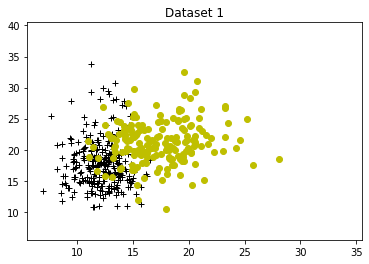

In [55]:
C = 1000
clf = svm.LinearSVC(C=C)
clf.fit(X_train, y_train)
print ('score:', clf.score(X_train, y_train))

plt.figure()
visualize_boundary_linear(X_train, y_train, clf)
plt.xlim([5.5, 35.5])
plt.ylim([5.5, 40.5])  
plt.title("Dataset 1")
plt.show()

In [56]:
predicciones = clf.predict(X_test) 
predicciones

array([1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.])

In [57]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 94.73684210526315%
